In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("BankLoanApproval.csv")
df.head()



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [17]:

education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}
dependent_mapping ={'Yes': 1, 'No':0}
loan_mapping ={'Education':0, 'Auto':1, 'Home':2, 'Other':3, 'Business':4}
cosigner_mapping={'Yes': 1, 'No':0}

# Select the specified columns
features2 = df[["Age", "Income", "LoanAmount", "CreditScore","InterestRate","LoanTerm","DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage","HasDependents","LoanPurpose","HasCoSigner"]]

# Map the education column
features2['Education'] = features2['Education'].map(education_mapping)

# Map the employment column
features2['EmploymentType'] = features2['EmploymentType'].map(employment_mapping)

# Map the marital status column
features2['MaritalStatus'] = features2['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
features2['HasMortgage'] = features2['HasMortgage'].map(mortgage_mapping)

features2['HasDependents'] = features2['HasDependents'].map(dependent_mapping)

features2['LoanPurpose'] = features2['LoanPurpose'].map(loan_mapping)

features2['HasCoSigner'] = features2['HasCoSigner'].map(cosigner_mapping)

label = 'Default'

scaler = StandardScaler()

X = scaler.fit_transform(features2)
y = df[label]

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

C:\Users\cheng\AppData\Local\Temp\ipykernel_23824\3511785386.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['Education'] = features2['Education'].map(education_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_23824\3511785386.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['EmploymentType'] = features2['EmploymentType'].map(employment_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_23824\3511785386.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [18]:
X

array([[-1.03387426,  1.48771049,  0.51102718, ..., -1.00056022,
        -1.41563766, -1.0002076 ],
       [-1.03387426,  1.71256441,  0.17193058, ..., -1.00056022,
        -1.41563766,  0.99979244],
       [-0.16664533, -1.52029137, -0.90416684, ..., -1.00056022,
        -0.70872833,  0.99979244],
       ...,
       [ 1.70123235, -1.22272758, -0.30595537, ...,  0.99944009,
         1.41199966, -1.0002076 ],
       [-0.16664533,  1.07655197,  1.72527874, ..., -1.00056022,
         0.70509033, -1.0002076 ],
       [ 1.1008431 , -1.58181115, -0.64941385, ..., -1.00056022,
         1.41199966, -1.0002076 ]])

In [19]:
# Initialize the KNN classifier with parameter k=7
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Train the KNN algorithm model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# List to store accuracies
cv_scores = []

# Number of folds
folds = 10

# Creating odd values of k for KNN
neighbors = list(range(1, 50, 2))

# Run cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = folds, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Identifying the best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('The optimal number of neighbors is %d' % optimal_k)

In [10]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
56107,46,39835,105422,594,10.69,12,0.15,3,1,1,1,1,0,1
62593,27,115368,110629,551,7.17,60,0.84,1,0,1,1,1,4,1
67841,34,34654,200924,810,3.02,12,0.13,0,0,1,1,0,1,0
229592,60,23608,26257,809,10.00,24,0.53,3,2,0,1,0,0,0
129601,34,35978,52997,555,24.27,36,0.65,1,0,2,0,1,4,1


In [11]:
# Check the accuracy of the model on the training set
knn_classifier.score(X_train, y_train)

0.8877612466403279

In [12]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on the test set: ", accuracy)

Accuracy of the model on the test set:  0.8774331257588219


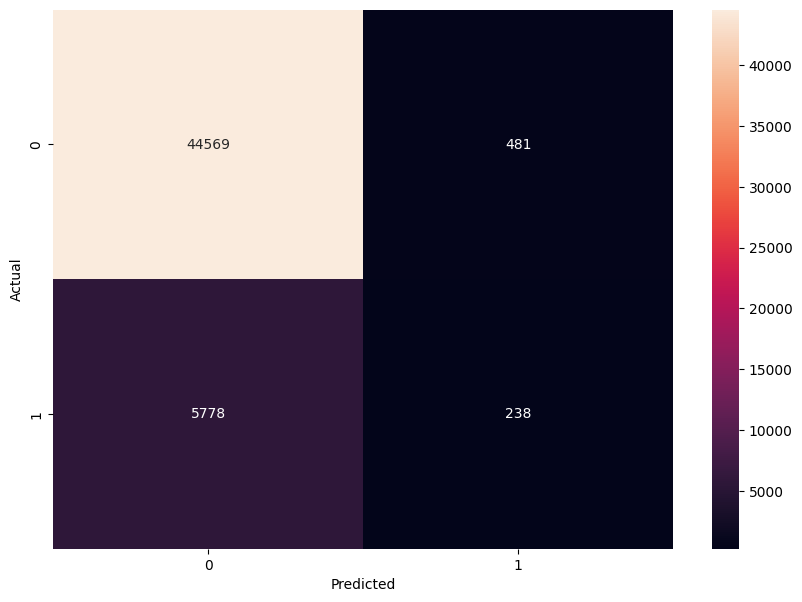

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Generate the classification report
class_report = classification_report(y_test, y_pred, digits=5)
print('\nClassification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

           0    0.88524   0.98932   0.93439     45050
           1    0.33102   0.03956   0.07068      6016

    accuracy                        0.87743     51066
   macro avg    0.60813   0.51444   0.50253     51066
weighted avg    0.81994   0.87743   0.83264     51066

